In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import categorical_accuracy
from keras.datasets import mnist
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Get training set and test set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
#Constants
SZ = 28
NUM_CLASSES = 10
BATCH_SIZE = 64
EPOCHS = 15
CLASSES = [0,1,2,3,4,5,6,7,8,9]

# Prepare the data

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(X_train.shape[0], SZ, SZ, 1)
X_test = X_test.reshape(X_test.shape[0], SZ, SZ, 1)

In [5]:
# Change labels to one-hot
Y_train = to_categorical(Y_train, NUM_CLASSES)
Y_test = to_categorical(Y_test, NUM_CLASSES)

# Check some images from training set

3
9
0
0


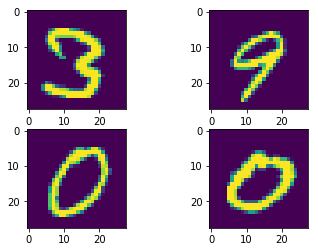

In [6]:
plt.figure()
h_length = 2
w_length = 2
for h in range(h_length):
    for w in range(w_length):
        i = h*w_length+w+1
        fig_loc = str(h_length) + str(w_length) + str(i)
        plt.subplot(h_length,w_length,i)
        num = 10*i
        idx = np.random.randint(X_train.shape[0])
        print(np.argmax(Y_train[idx]))
        imgplot = plt.imshow(X_train[idx,:,:,0])
plt.show()

# Build a model

In [7]:
#Build a model that I am going to train
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = 3, input_shape = (SZ, SZ, 1))) # (28, 28, 1) -> (26, 26, 8)
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 4, strides = 2)) #(26, 26, 8) -> (12, 12, 8)
model.add(Conv2D(filters = 16, kernel_size = 3)) #(12, 12, 8) -> (10, 10, 16)
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2, strides = 2)) # (10, 10, 16) -> (5, 5, 16)
model.add(Flatten()) #(5, 5, 16) -> (400)
model.add(Dense(128, activation = 'relu')) #(400) -> (128)
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 16)        0         
__________

In [8]:
#Compile the model
model.compile(optimizer = Adam(0.0005), loss = 'categorical_crossentropy', metrics = ['accuracy', categorical_accuracy])

# Train the model

In [9]:
hist = model.fit(x = X_train, y = Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 10s 179us/step - loss: 0.3013 - acc: 0.9072 - categorical_accuracy: 0.9072 - val_loss: 0.1373 - val_acc: 0.9653 - val_categorical_accuracy: 0.9653
Epoch 2/15
54000/54000 [==============================] - 8s 146us/step - loss: 0.1076 - acc: 0.9664 - categorical_accuracy: 0.9664 - val_loss: 0.1067 - val_acc: 0.9727 - val_categorical_accuracy: 0.9727
Epoch 3/15
54000/54000 [==============================] - 8s 146us/step - loss: 0.0799 - acc: 0.9754 - categorical_accuracy: 0.9754 - val_loss: 0.1049 - val_acc: 0.9732 - val_categorical_accuracy: 0.9732
Epoch 4/15
54000/54000 [==============================] - 8s 146us/step - loss: 0.0691 - acc: 0.9785 - categorical_accuracy: 0.9785 - val_loss: 0.1170 - val_acc: 0.9682 - val_categorical_accuracy: 0.9682
Epoch 5/15
54000/54000 [==============================] - 8s 146us/step - loss: 0.0595 - acc: 0.9815 - categorical_accuracy: 0.9815 - 

# Model evaluate

In [10]:
test_predictions = model.evaluate(x = X_test, y = Y_test, batch_size = BATCH_SIZE)

10000/10000 [==============================] - 0s 35us/step


In [11]:
print("Test loss:", test_predictions[0])
print("Test accuracy:", test_predictions[1])

Test loss: 0.05390314261838794
Test accuracy: 0.9833


# Plot results

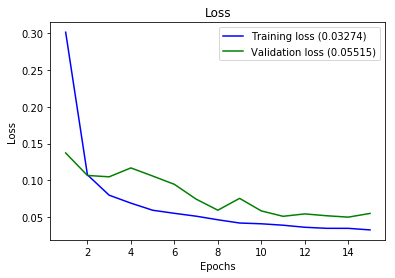

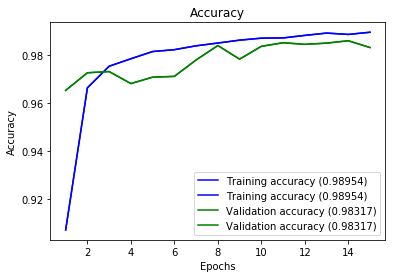

In [12]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(hist)